<a href="https://colab.research.google.com/github/itacodes/AB-Testing/blob/main/Final_Project_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

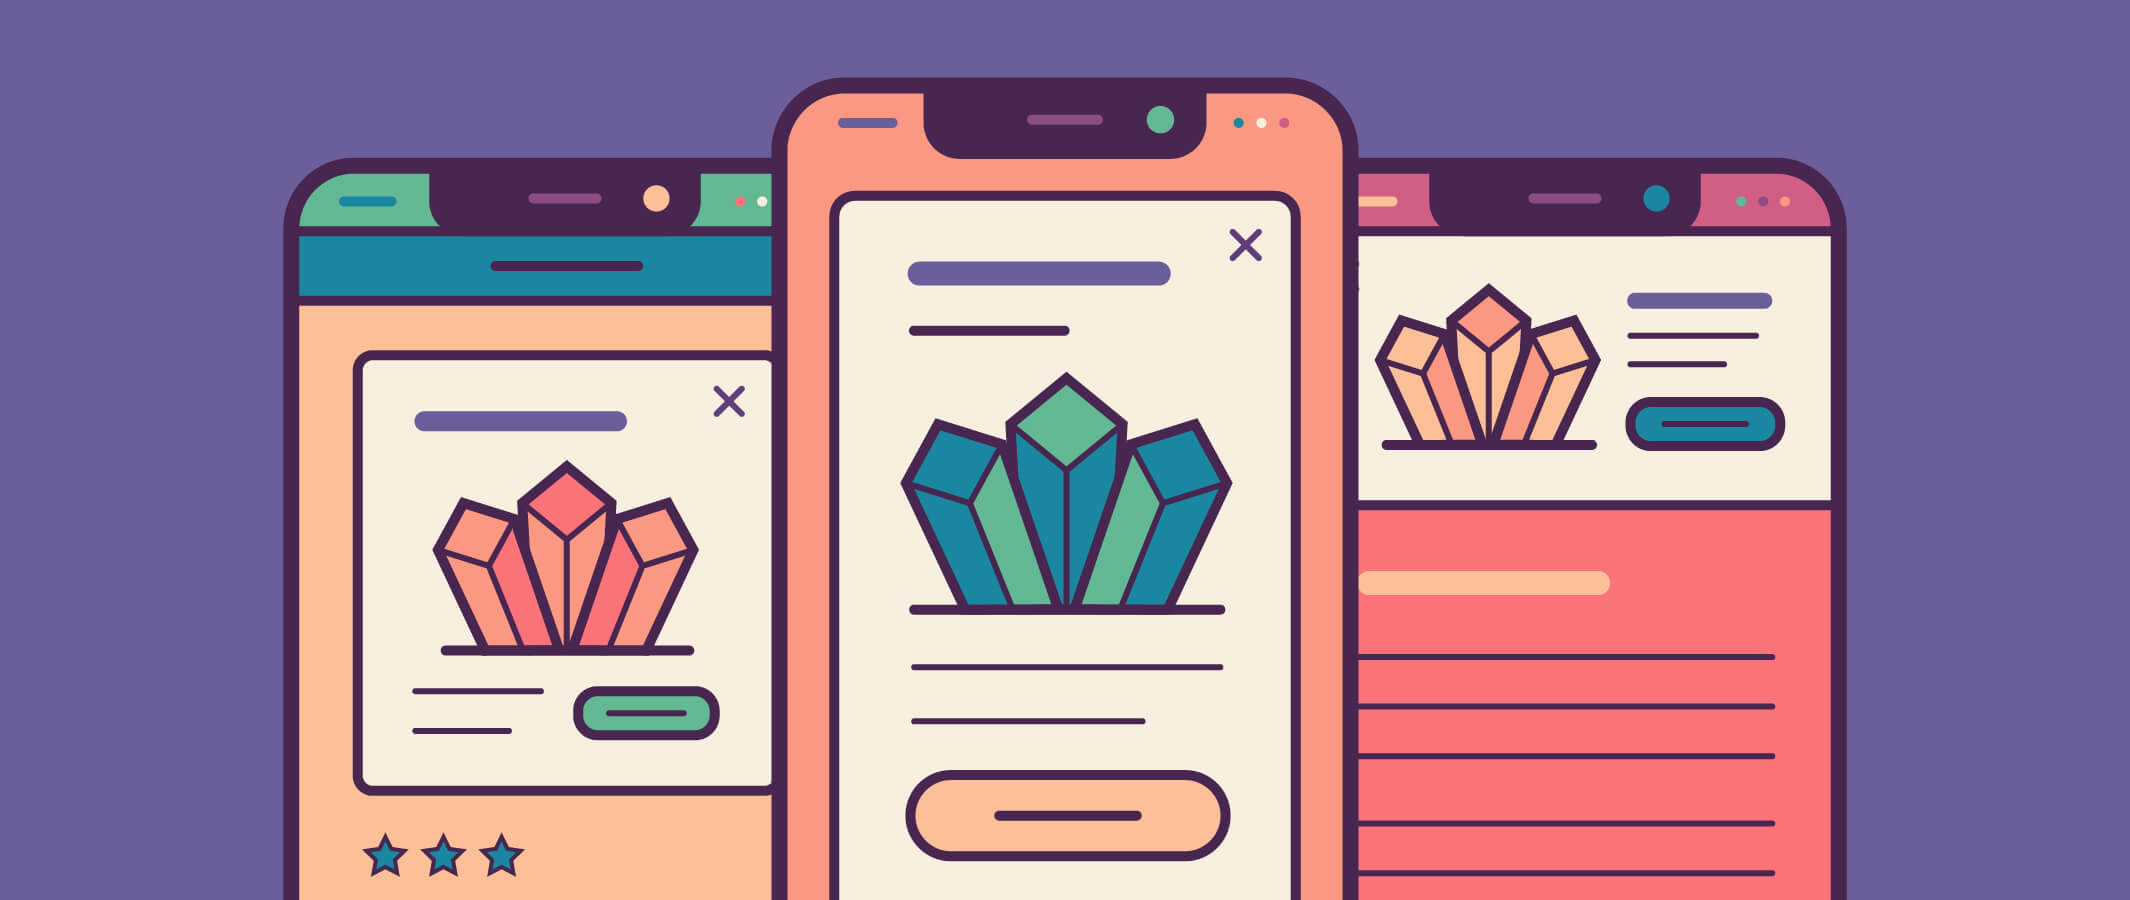

# Ads in Action: The Battle Royale of Boring vs. Breathtaking - Static vs. Interactive Ads



Ever wondered if interactive ads have the power to captivate and engage audiences better? This research aims to uncover the secret sauce by comparing the effects of static and interactive advertisements on questionnaire response rates. Get ready to discover whether the charm of interactivity or the allure of simplicity reigns supreme in capturing respondents' attention and boosting questionnaire response rates!

In [ ]:
# Import Package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

In [ ]:
# import data
df = pd.read_csv('AdSmartABdata.csv')

In [ ]:
# Lihat 5 baris teratas
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


**Hypothesis** <br>
H0: response rate treatment <= response rate control <br>
H1: response rate reatment > response rate control

**Randomization Unit**: Auction ID <br>
**Demografi Randomization Unit**: Users who get Ads

**Significance Level**: <br>
  * Confidence Level ($\alpha$) 5%,
  * Power ($1-\beta$) 80%
  * MDE ($\delta$) 1%
  * Standar Deviasi populasi ($\sigma$) 0.125


In [ ]:
# sample size
delta = 0.01
std_response = 0.125
sample_size = (16*std_response**2)/(delta)**2
print(f'Jumlah sampel yang dibutuhkan per grup: {round(sample_size)}')
print(f'Jumlah sampel yang dibutuhkan untuk seluruh grup: {round(2*sample_size)}')

Jumlah sampel yang dibutuhkan per grup: 2500
Jumlah sampel yang dibutuhkan untuk seluruh grup: 5000


In [ ]:
# Tampilkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [ ]:
# Cek Missing Values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [ ]:
#Check duplicate value
df.duplicated().sum()

0

In [ ]:
# Hitung Jumlah Sampel per Grup
df_control = df[df['experiment']=='control']
df_treatment = df[df['experiment']=='exposed']

n_control = df_control.shape[0]
n_treatment = df_treatment.shape[0]

n_control, n_treatment

(4071, 4006)

In [ ]:
# Mendapatkan banyak sampel yang response berdasarkan grup
n_control_response = df_control[df_control['yes']== 1].shape[0]
n_treatment_response = df_treatment[df_treatment['yes']== 1].shape[0]

n_control_response, n_treatment_response

(264, 308)

In [ ]:
# Mendapatkan nilai response rate berdasarkan grup
rr_control = n_control_response/n_control
rr_treatment = n_treatment_response/n_treatment

rr_control, rr_treatment

(0.06484893146647015, 0.07688467299051423)

<ipython-input-21-ea165a016234>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


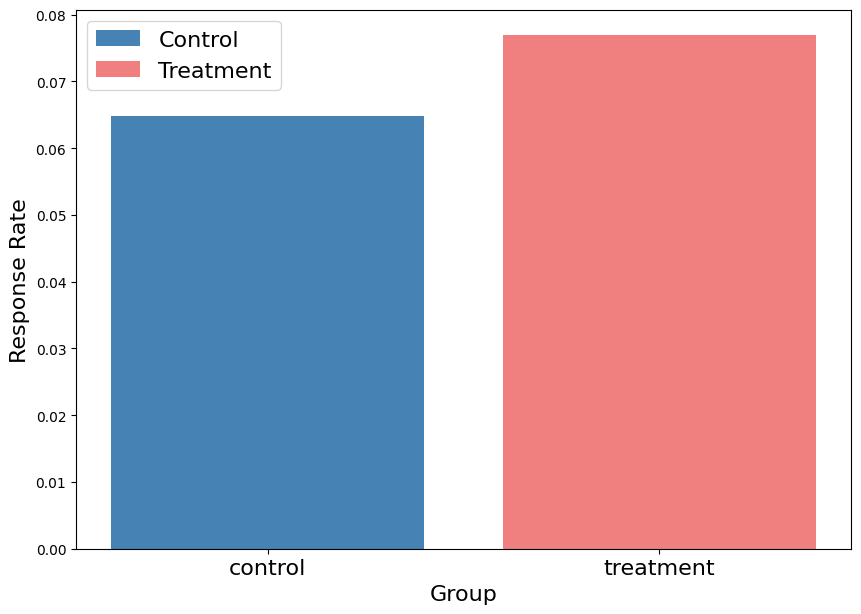

In [ ]:
#visualisasi response rate
# visualisasi perbandingan response rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", rr_control, color="steelblue", label="Control")
ax.bar("treatment", rr_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Response Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [ ]:
# Hitung Efek Relatif
relative_effect = (rr_treatment - rr_control)/rr_control * 100
print(f"relatife effect = {relative_effect:.3} %")

relatife effect = 18.6 %


### Uji Statistik

In [ ]:
# Buat count convert & total observation
count_convert = [n_treatment_response,n_control_response]
count_observation = [n_treatment,n_control]

In [ ]:
# Buat alternative
alternative_option = 'larger'

In [ ]:
# Panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 2.1083
P-value : 0.0175


In [ ]:
# Dari p-value
alpha = 0.05        # confidence level yang kita set

# Buat decision berdasarkan p_value dan alpha
if p_value < alpha:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


In [ ]:
# Z critical adalah z-value saat alpha
import scipy.stats as stats
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [ ]:
# Dari z-statistics
# Buat decision berdasarkan z_critical dan alpha
if z_stat > z_critical:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


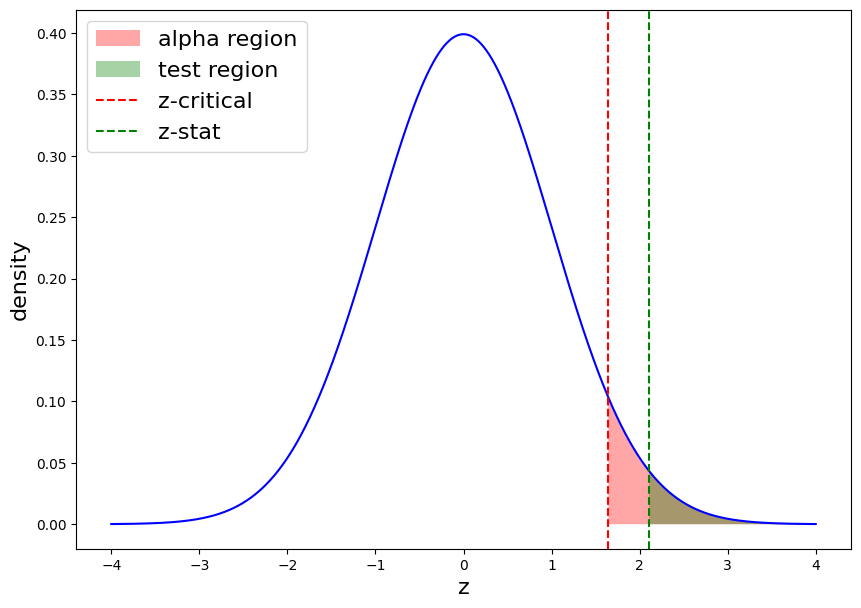

In [ ]:
# visualisasikan hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot distribusi sample
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot region dari alpha (region tempat menolak H-0)
# Region ini berwarna merah
x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha region")


# Plot region dari sampel
# Region ini berwarna hijau
x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "test region")


# Plot vertical line alpha
ax.axvline(z_critical,
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat,
           color = "green",
           linestyle = "--",
           label = "z-stat")


# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

# Kesimpulan

Setelah dilakukan pengujian statistik, diperoleh cukup bukti untuk menolak Hipotesis Null. Terdapat cukup bukti yang menunjukkan bahwa mengimplementasikan *interactive ads* dapat meningkatkan response rate BIO questionnaire.

